<a href="https://colab.research.google.com/github/tincho-mehaudy/DMCyT/blob/master/Abrir_datos_en_colab_(Hojas).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Referencias:

https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92

https://colab.research.google.com/notebooks/io.ipynb#scrollTo=vz-jH8T_Uk2c

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar los datos desde la computadora

In [ ]:
from google.colab import files
import io

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving hojas_2015_MasaSup.txt to hojas_2015_MasaSup.txt
User uploaded file "hojas_2015_MasaSup.txt" with length 688 bytes


In [ ]:
# Tomo los nombres de los archivos
filenames = list(uploaded.keys())

{'hojas_2015_MasaSup.txt': b'0.38,0.01,20.5,5\n0.6,0.01,19.5,4\n1.31,0.01,51,8.75\n0.62,0.01,29,6\n1.32,0.01,48.25,7.75\n0.72,0.01,37.125,9.375\n0.76,0.01,25,6\n0.25,0.01,9.625,3.375\n0.39,0.01,16.875,4.375\n0.26,0.01,17.875,5.125\n0.12,0.01,10.375,3.625\n1.7,0.01,67,7\n2.26,0.01,72,6\n1.68,0.01,64,7\n0.42,0.01,19,4\n0.75,0.01,37,6\n1.72,0.01,63,6\n1.58,0.01,24,5\n2.15,0.01,71,7\n0.96,0.01,31,4\n0.24,0.01,10,2\n0.09,0.01,4,2\n0.06,0.01,4,1\n0.04,0.01,2,1\n0.08,0.01,4,2\n0.1,0.01,6,2\n2.11,0.01,96,10\n2.34,0.01,112,10\n0.92,0.01,86,10\n0.49,0.01,28,7\n2.33,0.01,86,10\n2.4,0.01,96,10\n2.03,0.01,69,10\n3.71,0.01,137,20\n1.89,0.01,67,10\n0.69,0.01,34,5\n3.89,0.01,144,40\n2.2,0.01,85,20\n2.82,0.01,81,20\n1.09,0.01,57,9\n1.88,0.01,94,30\n1.91,0.01,74,30\n'}

In [ ]:
# Cargo el primero
df = pd.read_csv(filenames[0], header=None)
df.columns = ["Masa (gr)","Error Masa (gr)","Area (mm²)","Error Area (mm²)"]
df.head()

,Masa (gr),Error Masa (gr),Area (mm²),Error Area (mm²)
0,0.38,0.01,20.50,5.00
1,0.60,0.01,19.50,4.00
2,1.31,0.01,51.00,8.75
3,0.62,0.01,29.00,6.00
4,1.32,0.01,48.25,7.75


In [ ]:
df.shape

(42, 4)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

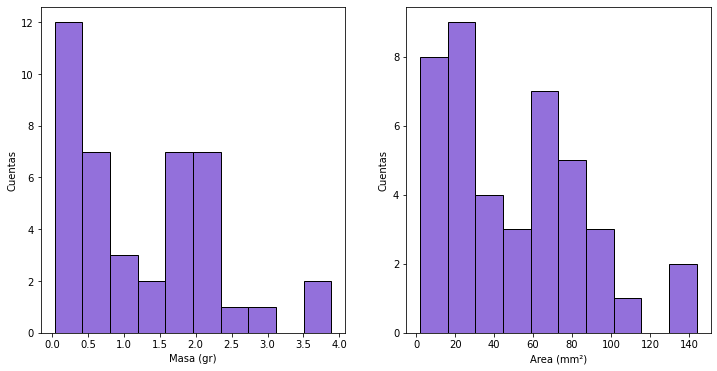

In [ ]:
masa = df["Masa (gr)"].to_numpy()
emasa = df["Error Masa (gr)"].to_numpy()
area = df["Area (mm²)"].to_numpy()
earea = df["Error Area (mm²)"].to_numpy()

fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2, figsize=(12,6))

ax1.hist(masa,bins=10,edgecolor='black',color='mediumpurple')
ax1.set(title='')
ax1.set(xlabel='Masa (gr)', ylabel='Cuentas')

ax2.hist(area,bins=10,edgecolor='black',color='mediumpurple')
ax1.set(title='')
ax2.set(xlabel='Area (mm²)', ylabel='Cuentas');

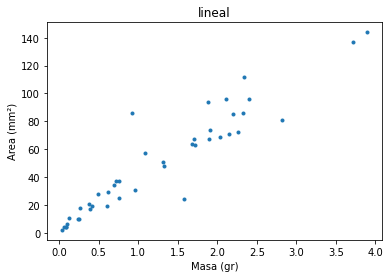

In [ ]:
plt.plot(masa,area,'.')
plt.title('lineal')
plt.ylabel('Area (mm²)')
plt.xlabel('Masa (gr)');

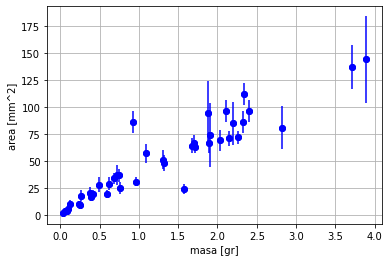

In [ ]:
# grafica las barras de error:
plt.errorbar(masa,area,xerr=emasa,yerr=earea,color='b',fmt='o')#,10000,fmt='-o',color='g')
# grafica los puntos:
plt.plot(masa,area,'ob')#,10000,fmt='-o',color='g')

# escribe los ejes y el título:
plt.xlabel('masa [gr]')
plt.ylabel('area [mm^2]')
plt.grid('on')#para que muestre la grilla
plt.show()

In [ ]:
# Si transformo las variables, tengo que transformar los errores
# [[ Si llegan a este punto consulten porque no vimos propagación de errores]]
lmasa = np.log(masa) # logaritmo natural, si quieren logaritmo en base 10 es np.log10
larea = np.log(area)
lemasa = emasa/masa # propagar error, ojo cuando propagan log10!!! 
learea = earea/area # propagar error, ojo cuando propagan log10!!! 

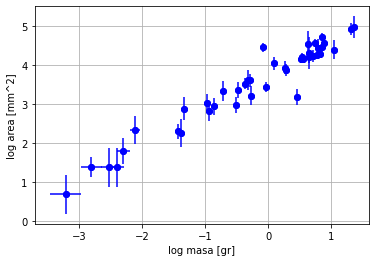

In [ ]:
# grafica las barras de error:
plt.errorbar(lmasa,larea,xerr=lemasa,yerr=learea,color='b',fmt='o')#,10000,fmt='-o',color='g')
# grafica los puntos:
plt.plot(lmasa,larea,'ob')#,10000,fmt='-o',color='g')

# escribe los ejes y el título:
plt.xlabel('log masa [gr]')
plt.ylabel('log area [mm^2]')
plt.grid('on')#para que muestre la grilla
plt.show()

In [ ]:
# Esto es necesario para realizar los ajustes lineales
from scipy.optimize import curve_fit
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

# Esta función es necesaria para calcular el R^2
def rquared(y,y_fit):
    ss_res = np.sum((y - y_fit) ** 2) # Suma de los residuos al cuadrado
    ss_tot = np.sum((y - np.mean(y)) ** 2) # Suma Total de los cuadrados
    return 1 - (ss_res / ss_tot)     # R^2

def ajuste_lineal(x,y):
  f = lambda x, a, b: a * x + b # la función modelo, con la que ajustamos
  popt, pcov = curve_fit(f, x, y) # ajusto sin incertezas en y
  sigmas = np.sqrt([pcov[0,0],pcov[1,1]]) # las incertezas de los parametros son la raiz de la diagonal de la matriz de covarianza
  a=popt[0]
  b=popt[1]
  ea=sigmas[0]
  eb=sigmas[1]
  R = rquared(y,a*x+b)
  print('R^2 = %0.2f' % R)
  print('Pendiente: %f ± %f'% (a,ea))
  print('Ordenada al origen: %f ± %f' % (b,eb))
  return a,b,ea,eb,R

R^2 = 0.94
Pendiente: 0.869053 ± 0.034625
Ordenada al origen: 3.725103 ± 0.042143


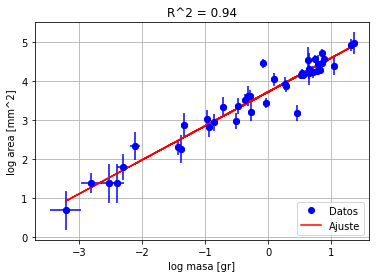

In [ ]:
a,b,ea,eb,R = ajuste_lineal(lmasa,larea)

# grafica las barras de error:
plt.errorbar(lmasa,larea,xerr=lemasa,yerr=learea,color='b',fmt='o')#,10000,fmt='-o',color='g')
# grafica los puntos:
plt.plot(lmasa,larea,'ob')#,10000,fmt='-o',color='g')

plt.plot(lmasa,a*lmasa+b,'r')

# escribe los ejes y el título:
plt.xlabel('log masa [gr]')
plt.ylabel('log area [mm^2]')
plt.title('R^2 = %0.2f' % R)
plt.grid('on')#para que muestre la grilla
plt.legend(("Datos","Ajuste"), loc=4)
plt.show()

In [ ]:
# Y si queremos usar los errores?
def ajuste_lineal_CMPesados(x,y,yerr):
  f = lambda x, a, b: a * x + b # la función modelo, con la que ajustamos
  popt, pcov = curve_fit(f, x, y, sigma = yerr,absolute_sigma=True)#ajusto con incertezas en y
                #sigma son las incertezas en y. absolute_sigma para que las considere absolutas.
  sigmas = np.sqrt([pcov[0,0],pcov[1,1]]) # las incertezas de los parametros son la raiz de la diagonal de la matriz de covarianza
  a=popt[0]
  b=popt[1]
  ea=sigmas[0]
  eb=sigmas[1]
  R = rquared(y,a*x+b)
  print('R^2 = %0.2f' % R)
  print('Pendiente: %f ± %f'% (a,ea))
  print('Ordenada al origen: %f ± %f' % (b,eb))
  return a,b,ea,eb,R

R^2 = 0.94
Pendiente: 0.843925 ± 0.032077
Ordenada al origen: 3.759745 ± 0.026429


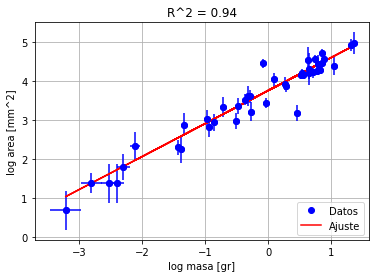

In [ ]:
a,b,ea,eb,R = ajuste_lineal_CMPesados(lmasa,larea,learea)

# grafica las barras de error:
plt.errorbar(lmasa,larea,xerr=lemasa,yerr=learea,color='b',fmt='o')#,10000,fmt='-o',color='g')
# grafica los puntos:
plt.plot(lmasa,larea,'ob')#,10000,fmt='-o',color='g')

plt.plot(lmasa,a*lmasa+b,'r')

# escribe los ejes y el título:
plt.xlabel('log masa [gr]')
plt.ylabel('log area [mm^2]')
plt.title('R^2 = %0.2f' % R)
plt.grid('on')#para que muestre la grilla
plt.legend(("Datos","Ajuste"), loc=4)
plt.show()